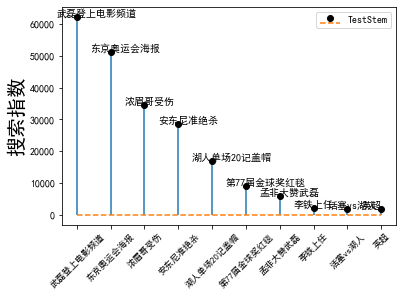

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# 生成模拟数据集
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10,8))
leabels=["武磊登上电影频道","东京奥运会海报","浓眉哥受伤",
         "安东尼准绝杀","湖人单场20记盖帽","第77届金球奖红毯","孟非大赞武磊"
        ,"李铁上任","活塞vs湖人","英超"]
y=[62253,51255,34541,28733,17073,9000,5963,2041,1879,1681]
x=range(len(y))
# 绘制棉棒图
markerline, stemlines, baseline = plt.stem(x,y,linefmt='-',markerfmt='o',basefmt='--',
                                           label='TestStem')
# 可单独设置棉棒末端，棉棒连线以及基线的属性
plt.setp(markerline, color='k')#将棉棒末端设置为黑色
plt.xticks(range(len(leabels)),leabels,fontsize=9, rotation=45)
plt.ylabel("搜索指数",fontsize=20)
for i,j,k in zip(x,y,leabels):
    plt.text(i-.6,j,k)
plt.legend()
plt.show()

<Figure size 480x480 with 0 Axes>

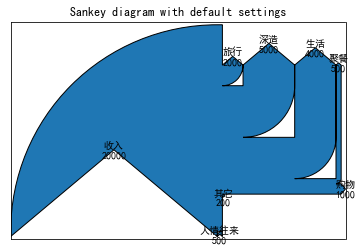

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
 
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
flo=[-2000,-5000,-4000,-1000,-500,20000,500,-200]
Sankey(flows=flo,
       labels=['旅行', '深造', '生活', '购物', '聚餐', '收入', '人情往来', '其它'],
       orientations=[np.random.choice([-1,0,1])for i in range(len(flo))]).finish()
plt.title("Sankey diagram with default settings")
plt.show()


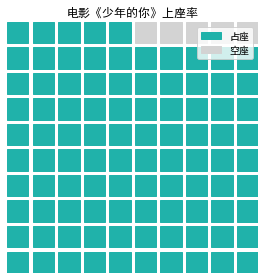

In [82]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# 绘制华夫饼图
plt.figure(FigureClass=Waffle, rows=10, columns=10, 
           values=[95, 5],vertical=True, colors=['#20B2AA', '#D3D3D3'], 
           title={'label': '电影《少年的你》上座率'}, 
           legend={'loc': 'upper right', 'labels': ['占座', '空座']}
)
# plt.legend()
plt.show()


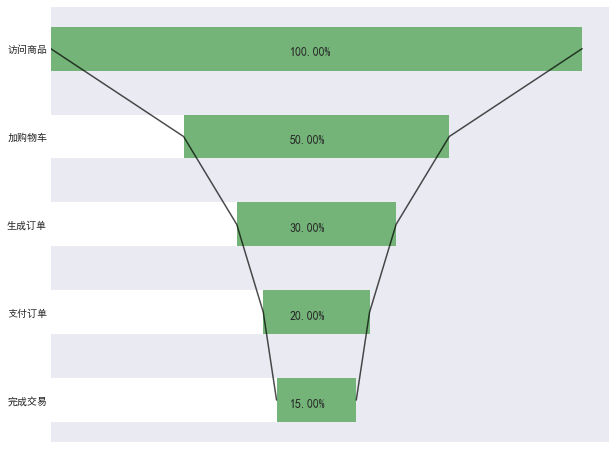

In [119]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
num = 5
height = 0.5
x1 = np.array([1000, 500, 300, 200, 150])    # 各环节的客户数量
x2 = np.array((x1.max() - x1) / 2)
x3 = [i +j for i, j in zip(x1, x2)]
x3 = np.array(x3)
y = -np.sort(-np.arange(num))               # 倒转y轴
labels=['访问商品', '加购物车', '生成订单', '支付订单', '完成交易']
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# 绘制条形图
rects1 = ax.barh(y, x3, height=.5, tick_label=labels, color='g', alpha=0.5)
# 绘制辅助条形图
rects2 = ax.barh(y, x2, height, color='w', alpha=1) 
ax.plot(x3, y, 'black', alpha=0.7)
ax.plot(x2, y, 'black', alpha=0.7)
# 添加无指向型注释文本
notes = []
for i in range(0, len(x1)):
    notes.append('%.2f%%'%((x1[i] / x1[0]) * 100))
for rect_one, rect_two, note in zip(rects1, rects2, notes):
    text_x = rect_two.get_width() + (rect_one.get_width() - rect_two.get_width()) / 2 -50
    text_y = rect_one.get_y() + height /3
    ax.text(text_x, text_y, note, fontsize=12)
# 隐藏轴脊和刻度
ax.set_xticks([])
for direction in ['top', 'left', 'bottom', 'right']:
    ax.spines[direction].set_color('red')
ax.yaxis.set_ticks_position('none')
plt.show()


In [97]:
-np.sort(-np.arange(num))

array([4, 3, 2, 1, 0])

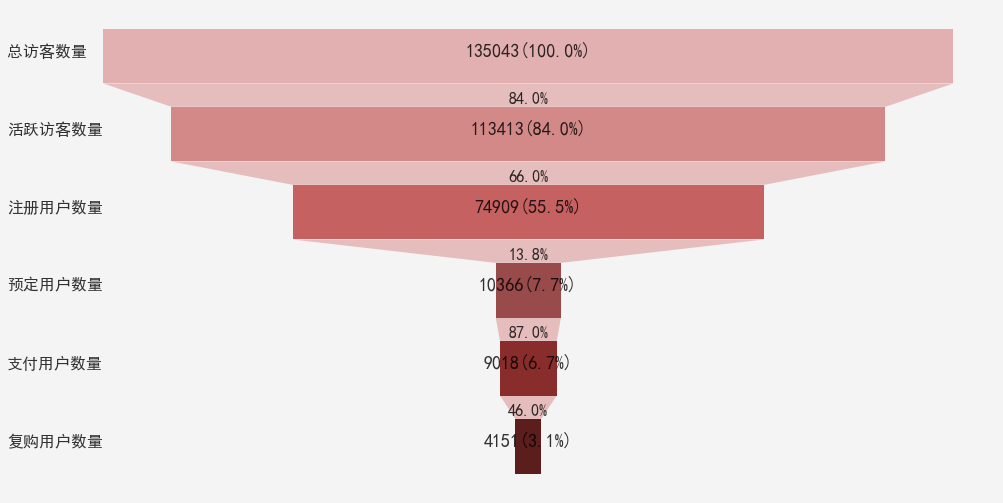

In [122]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon  # Polygon()可以用来传入按顺序组织的多边形顶点，从而生成出多边形
from matplotlib.collections import PatchCollection

plt.style.use('seaborn-dark')  # 设置主题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

visitor_num = 135043
data = [135043, 113413, 74909, 10366, 9018, 4151]
phase = ['总访客数量  ', '活跃访客数量', '注册用户数量', '预定用户数量', '支付用户数量', '复购用户数量']
data1 = [visitor_num/2 - i/2 for i in data]
data2 = [i+j for i,j in zip(data, data1)]
color_list = [ '#5c1d1d', '#892c2c','#994a4a', '#c56161', '#d48989', '#e2b0b0']  # 柱子颜色

fig,ax = plt.subplots(figsize=(16, 9),facecolor='#f4f4f4')
ax.barh(phase[::-1], data2[::-1], color = color_list, height=0.7)  # 柱宽设置为0.7
ax.barh(phase[::-1], data1[::-1],  color = '#f4f4f4', height=0.7)  # 设置成背景同色
ax.axis('off')

polygons = []
for i in range(len(data)):
    # 阶段
    ax.text(
      0,  # 坐标
      i,  # 高度
      phase[::-1][i],  # 文本
      color='black', alpha=0.8, size=16, ha="right")
    
    # 数量
    ax.text(
      data2[0] / 2 ,  
      i, 
      str(data[::-1][i]) +'(' +str(round(data[::-1][i] / data[0] * 100, 1)) + '%)', 
      color='black', alpha=0.8, size=18, ha="center")
    
    if i < 5:
        # 比例
        ax.text(
          data2[0] / 2 ,  
          4.4 - i, 
          str(round(data[i+1] / data[i], 3) * 100) + '%', 
          color='black', alpha=0.8, size=16, ha="center")
        
        # 绘制多边形
        polygons.append(Polygon(xy=np.array([(data1[i+1], 4+0.35-i),   # 因为柱状图的宽度设置成了0.7，所以一半便是0.35
                                             (data2[i+1], 4+0.35-i), 
                                             (data2[i], 5-0.35-i), 
                                             (data1[i], 5-0.35-i)])))
        
# 使用add_collection与PatchCollection来向Axes上添加多边形
ax.add_collection(PatchCollection(polygons, 
                                  facecolor='#e2b0b0',
                                  alpha=0.8));

plt.show()



In [121]:
phase[::-1]

['复购用户数量', '支付用户数量', '预定用户数量', '注册用户数量', '活跃访客数量', '总访客数量  ']

In [123]:
data2[::-1]

[69597.0, 72030.5, 72704.5, 104976.0, 124228.0, 135043.0]

In [124]:
data1[::-1]

[65446.0, 63012.5, 62338.5, 30067.0, 10815.0, 0.0]